In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
appendicities = pd.read_csv("appendicities.csv")
appendicities

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,5.5,no,...,yes,yes,yes,no,yes,no,no,noAppendicitis,conservative,no
1,12.410678,12.595222,female,152.0,29.1,8,8,yes,NaN,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,appendicitis,surgical,no
2,10.537988,15.991247,male,133.5,28.5,3,3,yes,6.0,no,...,no,NaN,no,no,NaN,NaN,no,noAppendicitis,conservative,no
3,10.425736,16.185025,male,146.0,34.5,4,3,yes,6.0,no,...,no,NaN,no,no,no,no,no,appendicitis,conservative,no
4,13.270363,20.449137,female,164.0,55.0,2,2,yes,6.5,no,...,no,no,no,no,no,yes,no,noAppendicitis,conservative,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,male,166.5,61.8,5,4,no,NaN,no,...,yes,yes,no,NaN,NaN,NaN,NaN,noAppendicitis,conservative,no
426,12.528405,29.316297,male,152.3,68.0,7,7,no,NaN,yes,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,noAppendicitis,conservative,no
427,12.013689,28.906250,male,160.0,74.0,5,6,no,NaN,yes,...,no,no,NaN,NaN,NaN,yes,NaN,noAppendicitis,conservative,no
428,7.739904,22.038188,female,120.5,32.0,5,3,no,NaN,no,...,yes,yes,NaN,no,NaN,yes,yes,noAppendicitis,conservative,no


### Handling Nulls

In [4]:
appendicities.isna().sum()

Age                             2
BMI                             0
Sex                             0
Height                          0
Weight                          0
AlvaradoScore                   0
PediatricAppendicitisScore      0
AppendixOnSono                  2
AppendixDiameter              164
MigratoryPain                   0
LowerAbdominalPainRight         1
ReboundTenderness               3
CoughingPain                    1
PsoasSign                      37
Nausea                          0
AppetiteLoss                    1
BodyTemp                        1
WBCCount                        4
NeutrophilPerc                 45
KetonesInUrine                123
ErythrocytesInUrine           123
WBCInUrine                    123
CRPEntry                        6
Dysuria                        19
Stool                           6
Peritonitis                     0
FreeFluids                     17
AppendixWallLayers            288
Kokarde                       280
TissuePerfusio

In [5]:
appendicities = appendicities.drop(["AppendixDiameter", "KetonesInUrine", "ErythrocytesInUrine", "WBCInUrine", "AppendixWallLayers", "Kokarde", "TissuePerfusion", "SurroundingTissueReaction", "PathLymphNodes", "MesentricLymphadenitis", "BowelWallThick", "Ileus", "FecalImpaction", "Meteorism", "Enteritis"], axis=1)
appendicities

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,MigratoryPain,LowerAbdominalPainRight,...,WBCCount,NeutrophilPerc,CRPEntry,Dysuria,Stool,Peritonitis,FreeFluids,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,no,yes,...,13.3,66.0,76.0,no,normal,no,no,noAppendicitis,conservative,no
1,12.410678,12.595222,female,152.0,29.1,8,8,yes,no,yes,...,14.9,93.2,10.0,no,normal,no,NaN,appendicitis,surgical,no
2,10.537988,15.991247,male,133.5,28.5,3,3,yes,no,yes,...,6.6,55.3,13.0,NaN,normal,no,no,noAppendicitis,conservative,no
3,10.425736,16.185025,male,146.0,34.5,4,3,yes,no,yes,...,12.4,57.9,6.0,NaN,normal,local,no,appendicitis,conservative,no
4,13.270363,20.449137,female,164.0,55.0,2,2,yes,no,yes,...,4.2,50.6,2.0,no,obstipation,no,no,noAppendicitis,conservative,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,male,166.5,61.8,5,4,no,no,yes,...,10.3,NaN,1.0,no,diarrhea,no,no,noAppendicitis,conservative,no
426,12.528405,29.316297,male,152.3,68.0,7,7,no,yes,yes,...,11.0,82.4,5.0,no,normal,no,no,noAppendicitis,conservative,no
427,12.013689,28.906250,male,160.0,74.0,5,6,no,yes,yes,...,7.5,56.3,1.0,no,normal,no,no,noAppendicitis,conservative,no
428,7.739904,22.038188,female,120.5,32.0,5,3,no,no,yes,...,9.8,54.5,55.0,no,obstipation,no,no,noAppendicitis,conservative,no


In [6]:
appendicities.isna().sum()

Age                            2
BMI                            0
Sex                            0
Height                         0
Weight                         0
AlvaradoScore                  0
PediatricAppendicitisScore     0
AppendixOnSono                 2
MigratoryPain                  0
LowerAbdominalPainRight        1
ReboundTenderness              3
CoughingPain                   1
PsoasSign                     37
Nausea                         0
AppetiteLoss                   1
BodyTemp                       1
WBCCount                       4
NeutrophilPerc                45
CRPEntry                       6
Dysuria                       19
Stool                          6
Peritonitis                    0
FreeFluids                    17
DiagnosisByCriteria            0
TreatmentGroupBinar            0
AppendicitisComplications      0
dtype: int64

In [7]:
appendicities["Age"].fillna(appendicities["Age"].mean(), inplace=True)
appendicities["BodyTemp"].fillna(appendicities["BodyTemp"].mean(), inplace=True)
appendicities["WBCCount"].fillna(appendicities["WBCCount"].mean(), inplace=True)
appendicities["NeutrophilPerc"].fillna(appendicities["NeutrophilPerc"].mean(), inplace=True)
appendicities["CRPEntry"].fillna(appendicities["CRPEntry"].mean(), inplace=True)
appendicities.isna().sum()

Age                            0
BMI                            0
Sex                            0
Height                         0
Weight                         0
AlvaradoScore                  0
PediatricAppendicitisScore     0
AppendixOnSono                 2
MigratoryPain                  0
LowerAbdominalPainRight        1
ReboundTenderness              3
CoughingPain                   1
PsoasSign                     37
Nausea                         0
AppetiteLoss                   1
BodyTemp                       0
WBCCount                       0
NeutrophilPerc                 0
CRPEntry                       0
Dysuria                       19
Stool                          6
Peritonitis                    0
FreeFluids                    17
DiagnosisByCriteria            0
TreatmentGroupBinar            0
AppendicitisComplications      0
dtype: int64

In [8]:
appendicities.dropna(subset=["AppendixOnSono", "LowerAbdominalPainRight", "ReboundTenderness", "CoughingPain", "PsoasSign","AppetiteLoss", "Dysuria", "Stool", "FreeFluids"], inplace=True)
appendicities.isna().sum()

Age                           0
BMI                           0
Sex                           0
Height                        0
Weight                        0
AlvaradoScore                 0
PediatricAppendicitisScore    0
AppendixOnSono                0
MigratoryPain                 0
LowerAbdominalPainRight       0
ReboundTenderness             0
CoughingPain                  0
PsoasSign                     0
Nausea                        0
AppetiteLoss                  0
BodyTemp                      0
WBCCount                      0
NeutrophilPerc                0
CRPEntry                      0
Dysuria                       0
Stool                         0
Peritonitis                   0
FreeFluids                    0
DiagnosisByCriteria           0
TreatmentGroupBinar           0
AppendicitisComplications     0
dtype: int64

In [9]:
appendicities

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,MigratoryPain,LowerAbdominalPainRight,...,WBCCount,NeutrophilPerc,CRPEntry,Dysuria,Stool,Peritonitis,FreeFluids,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,no,yes,...,13.3,66.000000,76.0,no,normal,no,no,noAppendicitis,conservative,no
4,13.270363,20.449137,female,164.0,55.0,2,2,yes,no,yes,...,4.2,50.600000,2.0,no,obstipation,no,no,noAppendicitis,conservative,no
6,13.215606,23.597004,female,171.0,69.0,3,3,yes,yes,yes,...,6.7,52.700000,3.0,yes,diarrhea,no,no,noAppendicitis,conservative,no
7,13.106092,22.070312,female,160.0,56.5,3,2,no,no,yes,...,7.0,53.900000,0.0,no,normal,no,no,appendicitis,surgical,no
11,11.693361,19.269691,male,154.0,45.7,6,5,yes,no,yes,...,12.0,84.000000,47.0,no,diarrhea,no,no,appendicitis,conservative,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,5.418207,15.704719,male,112.0,19.7,6,5,no,yes,yes,...,8.8,80.000000,76.0,no,obstipation,no,yes,noAppendicitis,conservative,no
424,15.488022,20.581591,female,167.0,57.4,7,5,no,no,yes,...,12.2,85.400000,55.0,no,normal,no,yes,noAppendicitis,conservative,no
425,12.147844,22.292563,male,166.5,61.8,5,4,no,no,yes,...,10.3,70.873506,1.0,no,diarrhea,no,no,noAppendicitis,conservative,no
426,12.528405,29.316297,male,152.3,68.0,7,7,no,yes,yes,...,11.0,82.400000,5.0,no,normal,no,no,noAppendicitis,conservative,no


In [10]:
appendicities = appendicities.reset_index()

In [11]:
appendicities

,index,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,MigratoryPain,...,WBCCount,NeutrophilPerc,CRPEntry,Dysuria,Stool,Peritonitis,FreeFluids,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,0,12.531143,16.494601,male,159.0,41.7,7,5,yes,no,...,13.3,66.000000,76.0,no,normal,no,no,noAppendicitis,conservative,no
1,4,13.270363,20.449137,female,164.0,55.0,2,2,yes,no,...,4.2,50.600000,2.0,no,obstipation,no,no,noAppendicitis,conservative,no
2,6,13.215606,23.597004,female,171.0,69.0,3,3,yes,yes,...,6.7,52.700000,3.0,yes,diarrhea,no,no,noAppendicitis,conservative,no
3,7,13.106092,22.070312,female,160.0,56.5,3,2,no,no,...,7.0,53.900000,0.0,no,normal,no,no,appendicitis,surgical,no
4,11,11.693361,19.269691,male,154.0,45.7,6,5,yes,no,...,12.0,84.000000,47.0,no,diarrhea,no,no,appendicitis,conservative,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,423,5.418207,15.704719,male,112.0,19.7,6,5,no,yes,...,8.8,80.000000,76.0,no,obstipation,no,yes,noAppendicitis,conservative,no
363,424,15.488022,20.581591,female,167.0,57.4,7,5,no,no,...,12.2,85.400000,55.0,no,normal,no,yes,noAppendicitis,conservative,no
364,425,12.147844,22.292563,male,166.5,61.8,5,4,no,no,...,10.3,70.873506,1.0,no,diarrhea,no,no,noAppendicitis,conservative,no
365,426,12.528405,29.316297,male,152.3,68.0,7,7,no,yes,...,11.0,82.400000,5.0,no,normal,no,no,noAppendicitis,conservative,no


In [12]:
appendicities.drop("index", axis=1, inplace=True)

In [13]:
appendicities

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,MigratoryPain,LowerAbdominalPainRight,...,WBCCount,NeutrophilPerc,CRPEntry,Dysuria,Stool,Peritonitis,FreeFluids,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,no,yes,...,13.3,66.000000,76.0,no,normal,no,no,noAppendicitis,conservative,no
1,13.270363,20.449137,female,164.0,55.0,2,2,yes,no,yes,...,4.2,50.600000,2.0,no,obstipation,no,no,noAppendicitis,conservative,no
2,13.215606,23.597004,female,171.0,69.0,3,3,yes,yes,yes,...,6.7,52.700000,3.0,yes,diarrhea,no,no,noAppendicitis,conservative,no
3,13.106092,22.070312,female,160.0,56.5,3,2,no,no,yes,...,7.0,53.900000,0.0,no,normal,no,no,appendicitis,surgical,no
4,11.693361,19.269691,male,154.0,45.7,6,5,yes,no,yes,...,12.0,84.000000,47.0,no,diarrhea,no,no,appendicitis,conservative,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,5.418207,15.704719,male,112.0,19.7,6,5,no,yes,yes,...,8.8,80.000000,76.0,no,obstipation,no,yes,noAppendicitis,conservative,no
363,15.488022,20.581591,female,167.0,57.4,7,5,no,no,yes,...,12.2,85.400000,55.0,no,normal,no,yes,noAppendicitis,conservative,no
364,12.147844,22.292563,male,166.5,61.8,5,4,no,no,yes,...,10.3,70.873506,1.0,no,diarrhea,no,no,noAppendicitis,conservative,no
365,12.528405,29.316297,male,152.3,68.0,7,7,no,yes,yes,...,11.0,82.400000,5.0,no,normal,no,no,noAppendicitis,conservative,no


In [14]:
# Save as a new dataset
appendicities.to_csv("appendicities-cleaned-data.csv")

In [15]:
appendicities.describe()

,Age,BMI,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,BodyTemp,WBCCount,NeutrophilPerc,CRPEntry
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,11.526654,19.159741,149.416076,44.571621,5.694823,4.953678,37.541362,12.226590,70.347393,26.717554
std,3.341805,4.396450,19.547581,17.150933,2.163924,2.012402,1.001988,5.087796,13.794090,48.665602
min,0.035592,7.827983,47.500000,3.275000,2.000000,1.000000,26.900000,2.600000,27.200000,0.000000
25%,9.545517,15.907418,138.750000,32.000000,4.000000,4.000000,37.000000,8.500000,60.800000,1.000000
50%,11.761807,18.444444,151.000000,43.000000,6.000000,5.000000,37.400000,11.500000,71.000000,7.000000
75%,13.972621,21.465021,163.750000,56.000000,7.000000,6.000000,38.150000,15.450000,81.100000,29.500000
max,17.872690,38.156221,190.000000,98.000000,10.000000,10.000000,40.200000,33.300000,94.100000,355.000000


In [16]:
appendicities.groupby("DiagnosisByCriteria").mean()

,Age,BMI,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,BodyTemp,WBCCount,NeutrophilPerc,CRPEntry
DiagnosisByCriteria,,,,,,,,,,
appendicitis,11.329806,18.807909,148.757143,43.380591,6.556650,5.665025,37.720099,14.094726,75.379685,39.049583
noAppendicitis,11.770313,19.595240,150.231707,46.045884,4.628049,4.073171,37.320122,9.914203,64.118397,11.452908


{'whiskers': [<matplotlib.lines.Line2D at 0x1f03e3f9f60>,
 'caps': [<matplotlib.lines.Line2D at 0x1f03e3fa500>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f03e3f9c90>],
 'medians': [<matplotlib.lines.Line2D at 0x1f03e3faaa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f03e3fad70>],
 'means': []}

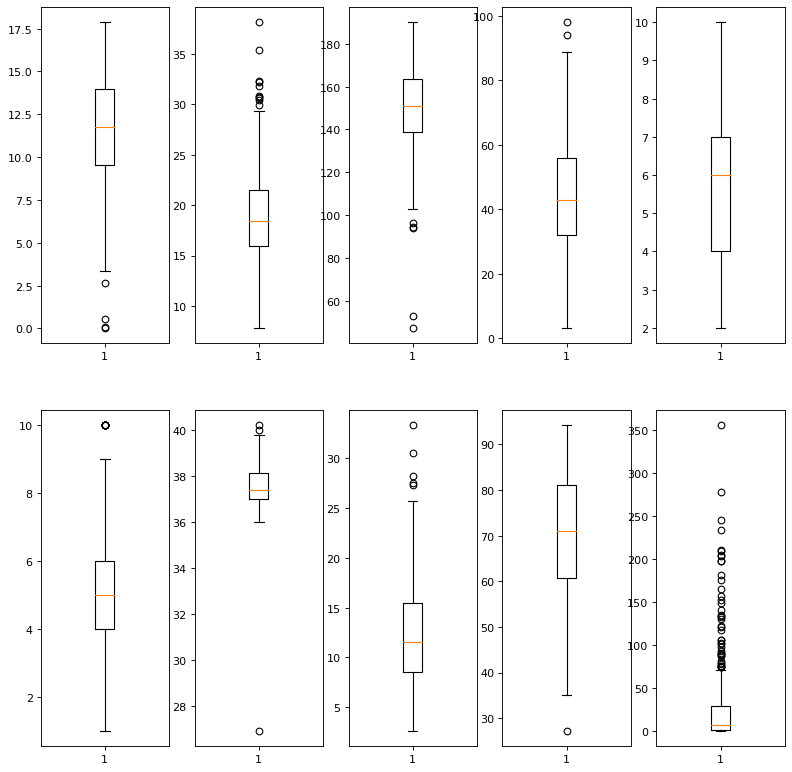

In [17]:
plt.figure(figsize=(12,12), dpi=80)

plt.subplot(2,5,1)
plt.boxplot(appendicities["Age"])
plt.subplot(2,5,2)
plt.boxplot(appendicities["BMI"])
plt.subplot(2,5,3)
plt.boxplot(appendicities["Height"])
plt.subplot(2,5,4)
plt.boxplot(appendicities["Weight"])
plt.subplot(2,5,5)
plt.boxplot(appendicities["AlvaradoScore"])
plt.subplot(2,5,6)
plt.boxplot(appendicities["PediatricAppendicitisScore"])
plt.subplot(2,5,7)
plt.boxplot(appendicities["BodyTemp"])
plt.subplot(2,5,8)
plt.boxplot(appendicities["WBCCount"])
plt.subplot(2,5,9)
plt.boxplot(appendicities["NeutrophilPerc"])
plt.subplot(2,5,10)
plt.boxplot(appendicities["CRPEntry"])

(array([288.,  36.,  19.,   8.,   5.,   7.,   2.,   1.,   0.,   1.]),
 array([  0. ,  35.5,  71. , 106.5, 142. , 177.5, 213. , 248.5, 284. ,
        319.5, 355. ]),
 <BarContainer object of 10 artists>)

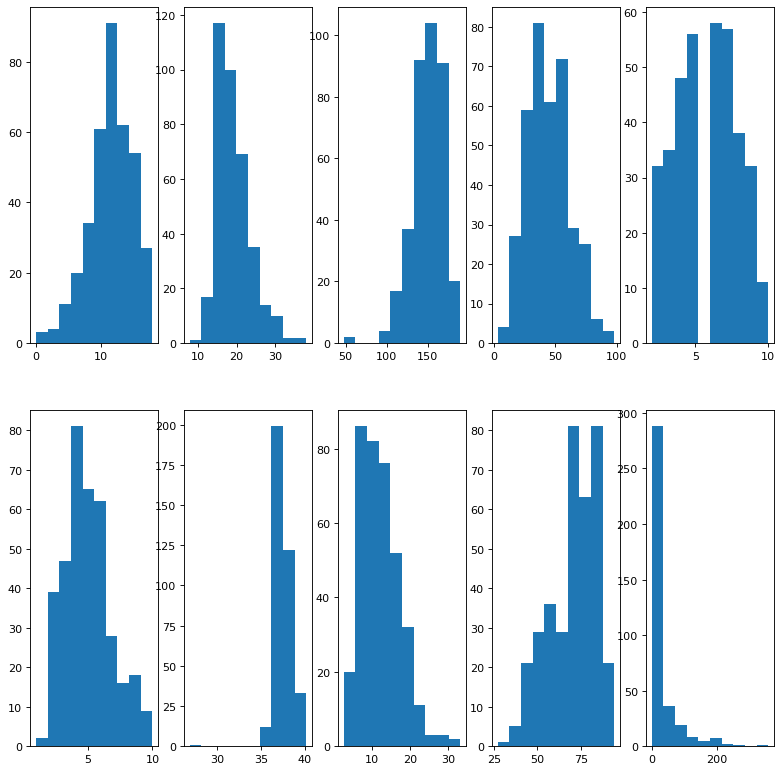

In [18]:
plt.figure(figsize=(12,12), dpi=80)

plt.subplot(2,5,1)
plt.hist(appendicities["Age"])
plt.subplot(2,5,2)
plt.hist(appendicities["BMI"])
plt.subplot(2,5,3)
plt.hist(appendicities["Height"])
plt.subplot(2,5,4)
plt.hist(appendicities["Weight"])
plt.subplot(2,5,5)
plt.hist(appendicities["AlvaradoScore"])
plt.subplot(2,5,6)
plt.hist(appendicities["PediatricAppendicitisScore"])
plt.subplot(2,5,7)
plt.hist(appendicities["BodyTemp"])
plt.subplot(2,5,8)
plt.hist(appendicities["WBCCount"])
plt.subplot(2,5,9)
plt.hist(appendicities["NeutrophilPerc"])
plt.subplot(2,5,10)
plt.hist(appendicities["CRPEntry"])

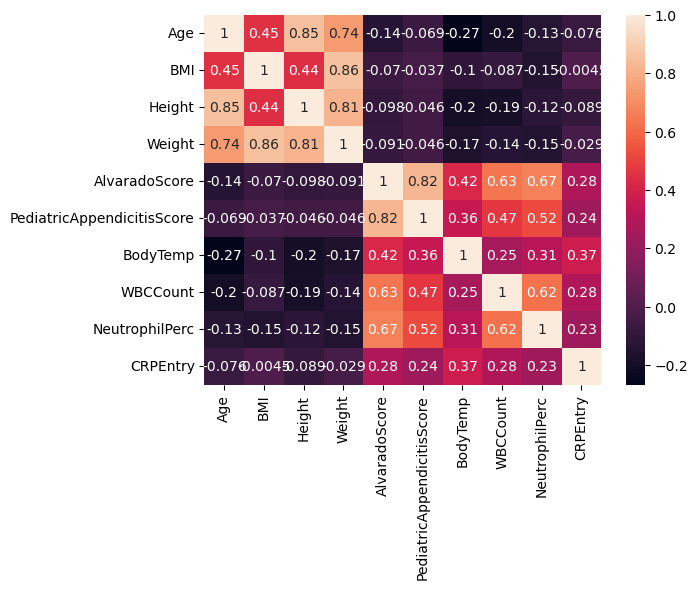

In [19]:
import seaborn as sns
 
#plotting the heatmap for correlation
ax = sns.heatmap(appendicities.corr(), annot=True)